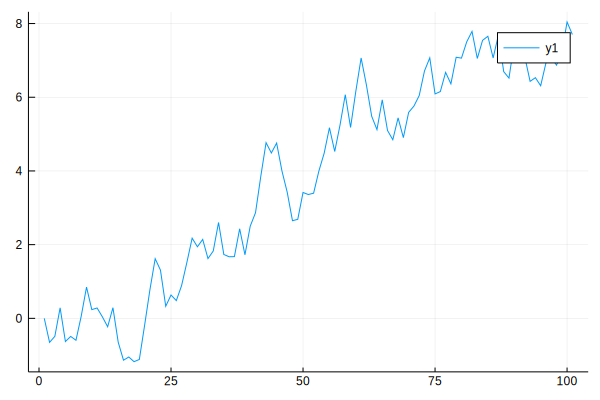

In [1]:
using Plots; gr()
using IJulia

walk = [0.0]
for ii in 1:100
    step = 2rand()-1.0
    push!(walk, walk[end]+step)
    plot(1:length(walk), walk) |> IJulia.display
    IJulia.clear_output(true)
    #sleep(0.2)
end

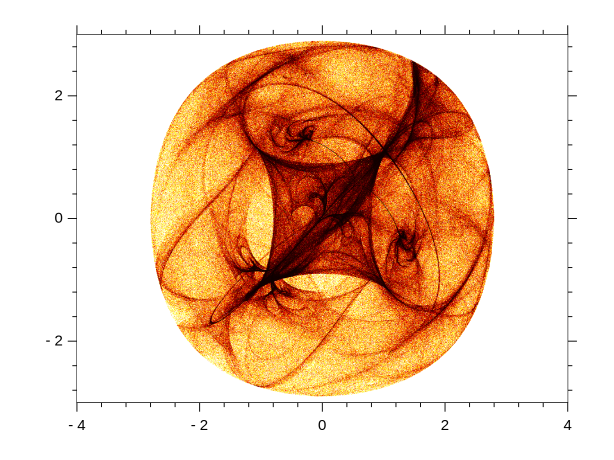

In [2]:
function clifford(x::Float64, y::Float64, a::Float64, b::Float64, c::Float64, d::Float64)
    sin(a * y) + c * cos(a * x), sin(b * x) + d * cos(b * y)
end
function trajectory(fn, x0::Float64, y0::Float64, a::Float64, b::Float64, c::Float64, d::Float64, 
        dθ::Float64,  n::Int64)
    x, y, θ = zeros(n), zeros(n), 0.01
    x[1], y[1] = x0, y0
    for i = 1:n
        xd, yd = fn(x[i], y[i], a, b, c, d)
        @inbounds x[i+1], y[i+1] = xd*cos(θ), yd*cos(θ)
        θ += dθ
    end
    x, y
end
n = 5000000
x, y = trajectory(clifford, 0.0, 0.0, -1.3, -1.3, -1.8, -1.9, 0.007, n);
using GR
# shade(x, y, xform=GR.XFORM_EQUALIZED, colormap=-GR.COLORMAP_HOT, xlim=(-4,4), ylim=(-3,3))
shade(x, y, colormap=-GR.COLORMAP_HOT, xlim=(-4,4), ylim=(-3,3))

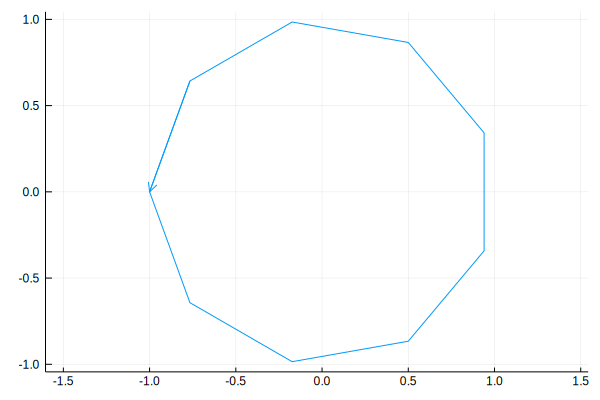

In [3]:
using Plots
# a,b = -π, π
a,b = -π, π
tt = range(a, stop=b, length=10)

γ = t -> exp(+im*t) + .0*exp(-im*t)

plot(real.(γ.(tt)), imag.(γ.(tt)); ratio=1.0, legend=false, arrow=true)
#plot(tt, real.(γ.(tt)); ratio=1.0, legend=false, arrow=true)
#plot(tt, imag.(γ.(tt)); ratio=1.0, legend=false, arrow=true)


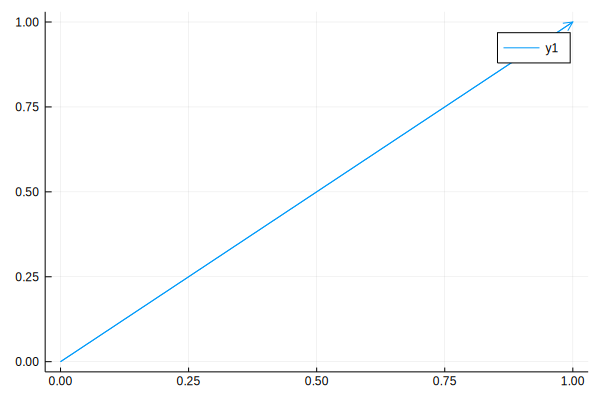

In [3]:
plot([0;1], [0;1]; arrow=true)

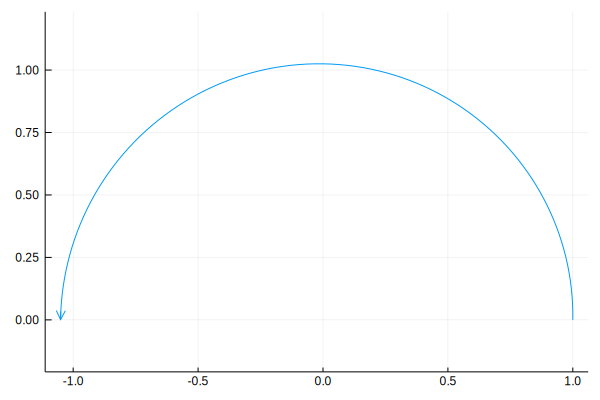

In [4]:
using Plots
using IJulia

f = (i,n) -> (1+im*π/n)^i

data = [0.0]
for n in 0:100
    # push!(data, data[end]+step)
    x = range(0, stop=n, length=n+1);
    xx = real.(f.(x,n))
    yy = imag.(f.(x,n))
    plot(xx, yy; ratio=1.0, legend=false, arrow=true) |> IJulia.display
    # plot(1:length(data), data) |> IJulia.display
    IJulia.clear_output(true)
    sleep(.2)
end

In [2]:
using GR
using Printf
using LinearAlgebra

# Simple particle simulation

const N = 500                   # number of particles
M = 0.05 * ones(Float64, N)     # masses
const S = 0.04                  # size of particles
const dt = 1.0 / 30

function step(dt, p, v)
  # update positions
  p[:,:] += dt * v[:,:]

  # find pairs of particles undergoing a collision
  for i in 1:N
    for j in i+1:N
      dx = p[i,1] - p[j,1]
      dy = p[i,2] - p[j,2]
      d = sqrt(dx*dx + dy*dy)

      if d < 2*S
        # relative location & velocity vectors
        r_rel = p[i] - p[j]
        v_rel = v[i] - v[j]

        # momentum vector of the center of mass
        v_cm = (M[i] * v[i] + M[j] * v[j]) / (M[i] + M[j])

        # collisions of spheres reflect v_rel over r_rel
        rr_rel = dot(r_rel, r_rel)
        vr_rel = dot(v_rel, r_rel)
        v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

        # assign new velocities
        v[i] = v_cm + v_rel * M[j] / (M[i] + M[j])
        v[j] = v_cm - v_rel * M[i] / (M[i] + M[j])
      end
    end
  end

  # check for crossing boundary
  for i in 1:N
    if p[i,1] < -2 + S
      p[i,1] = -2 + S
      v[i,1] *= -1
    elseif p[i,1] > 2 - S
      p[i,1] = 2 - S
      v[i,1] *= -1
    end
    if p[i,2] < -2 + S
      p[i,2] = -2 + S
      v[i,2] *= -1
    elseif p[i,2] > 2 - S
      p[i,2] = 2 - S
      v[i,2] *= -1
    end
  end

  return p, v
end

function main()

  setwindow(-2, 2, -2, 2)
  setviewport(0, 1, 0, 1)
  setmarkertype(GR.MARKERTYPE_SOLID_CIRCLE)
  setmarkersize(1.0)

  n = 0
  t = 0.0

  p = (rand(N,2) .- 0.5) .* (4 .- 2 .* S)    # initial positions
  v = rand(N,2) .- 0.5                       # initial velocities

  s = time_ns()

  while n < 300

    p, v = step(dt, p, v)

    clearws()
    setmarkercolorind(983)
    polymarker(p[:,1], p[:,2])

    if n > 0
      text(0.01, 0.95, @sprintf("%10s: %4d fps", "Julia", round(n / (1e-9 * (time_ns() - s)))))
    end
    updatews()

    n += 1
    t += dt

  end
end

main()

┌ Info: Saved animation to 
│   fn = E:\GitHub\julia-experiments\lidar\tmp.gif
└ @ Plots C:\Users\aless\.julia\packages\Plots\cc8wh\src\animation.jl:98


Plots.AnimatedGif("E:\\GitHub\\julia-experiments\\lidar\\tmp.gif")
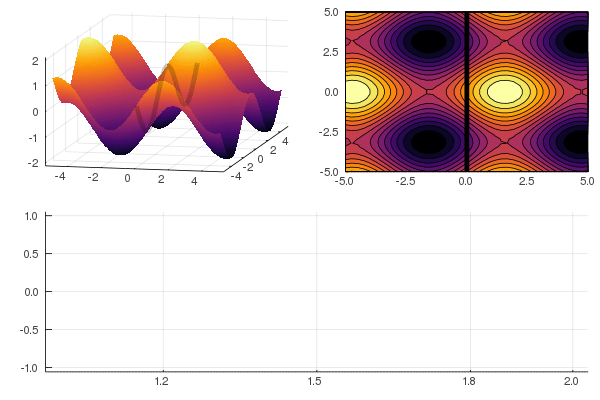

In [1]:
using Plots
default(legend = false)
x = y = range(-5, 5, length = 40)
zs = zeros(0, 40)
n = 100

@gif for i in range(0, stop = 2π, length = n)
    f(x, y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.5w} b; c{0.5h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout = l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera = (10 * (1 + cos(i)), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)
end

┌ Info: Saved animation to 
│   fn = E:\GitHub\julia-experiments\lidar\tmp.gif
└ @ Plots C:\Users\aless\.julia\packages\Plots\cc8wh\src\animation.jl:98


Plots.AnimatedGif("E:\\GitHub\\julia-experiments\\lidar\\tmp.gif")
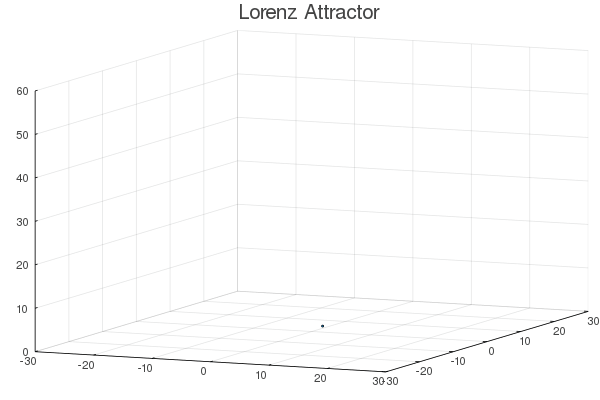

In [2]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

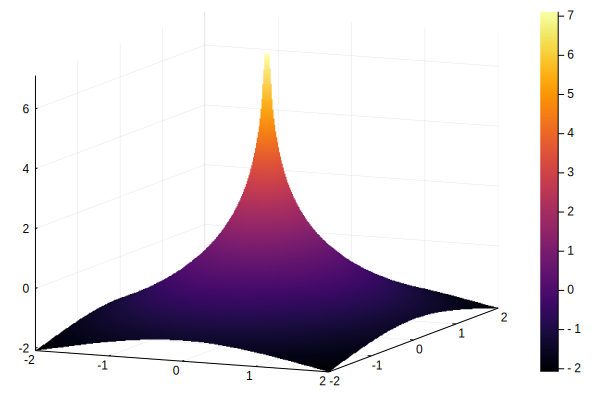

In [34]:
using Plots; gr()
x=range(-2,stop=2,length=100)
y=range(-2,stop=2,length=100)
f(x,y) = -log(x^2+y^2)
plot(x,y,f,st=:surface)

In [33]:
Xmin = -5
Xmax = 5
Xn = 175
Ymin = -5
Ymax = 5
Yn = 175

resample_factor = 4

# sampling
x = collect(range(Xmin, stop=Xmax, length=Xn))
xn = length(x)
y = collect(range(Ymin, stop=Ymax, length=Yn))
yn = length(y)


175

In [86]:
struct Antenna
    x::Float64
    y::Float64
end

tg(x,y) = ((abs(x).<1) & (abs(y).<2))

antennas = Antenna[]
push!(antennas, Antenna(-1, 0))
push!(antennas, Antenna(1, 0))
push!(antennas, Antenna(0, -2))
push!(antennas, Antenna(0, 0))

N_inputs = length(antennas)

# field
field(a, x, y) = 1/(((x.-antennas[a].x).^2 + (y.-antennas[a].y).^2))

# car shape
tg(x, y) = ((abs(x).<1) & (abs(y).<2))
field_dump(a, x, y) = exp(3*(a<4).*tg(x,y) + 3*(a>=4).*(!tg(x,y)))

# field model: car + noise
carmodel(a, x, y, noise) = (900*field(a, x, y)./field_dump(a, x, y)) .+ noise*rand(size(x))
flogv(a, x, y, noise) = log(carmodel(a, x, y, noise))


flogv (generic function with 1 method)

In [87]:
f(x,y)=field_dump(1,x,y,0)

f (generic function with 1 method)

In [88]:
plot(x,y,f,st=:surface)

MethodError: MethodError: no method matching field_dump(::Int64, ::Float64, ::Float64, ::Int64)
Closest candidates are:
  field_dump(::Any, ::Any, ::Any) at In[86]:21